 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [3]:
# Import libraries and dependencies to complete analysis
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

## Whale Returns
Read the Whale Portfolio daily returns and clean the data

In [4]:
# Read in the whale returns
whale_path = Path("whale_returns.csv")
whale_data = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
# Count the nulls in whale data
whale_data.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop the nulls in whale data
whale_data.dropna(inplace=True)
whale_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Read in algorithmic returns
algo_path = Path("algo_returns.csv")
algo_data = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count the nulls in algorithmic data
algo_data.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop the nulls in algothrithmic data
algo_data.dropna(inplace=True)
algo_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Read in S&P 500 closing prices
sp500_path = Path("sp500_history.csv")
sp500_data = pd.read_csv(sp500_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_data = sp500_data.sort_index()

In [11]:
# Check data types in S&P 500 closing prices
sp500_data.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types ie remove dollar sigs to make a float
sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")
sp500_data["Close"] = sp500_data["Close"].astype("float")

C:\Users\HK\AppData\Local\Temp\ipykernel_13628\35610817.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_data["Close"] = sp500_data["Close"].str.replace("$", "")


In [13]:
# Calculate the daily returns in SP500
sp500_returns = sp500_data.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [14]:
# Drop the nulls in SP500 daily returns
sp500_returns.dropna(inplace=True)

In [15]:
# Rename `Close` Column to daily returns for SP500
sp500_returns.columns = ["SP500 Daily Returns"]
sp500_returns.head()

,SP500 Daily Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([sp500_returns, algo_data, whale_data], axis="columns", join="inner")
combined_returns.sort_index(inplace=True)
combined_returns.head()

,SP500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Combined Returns'}, xlabel='Date'>

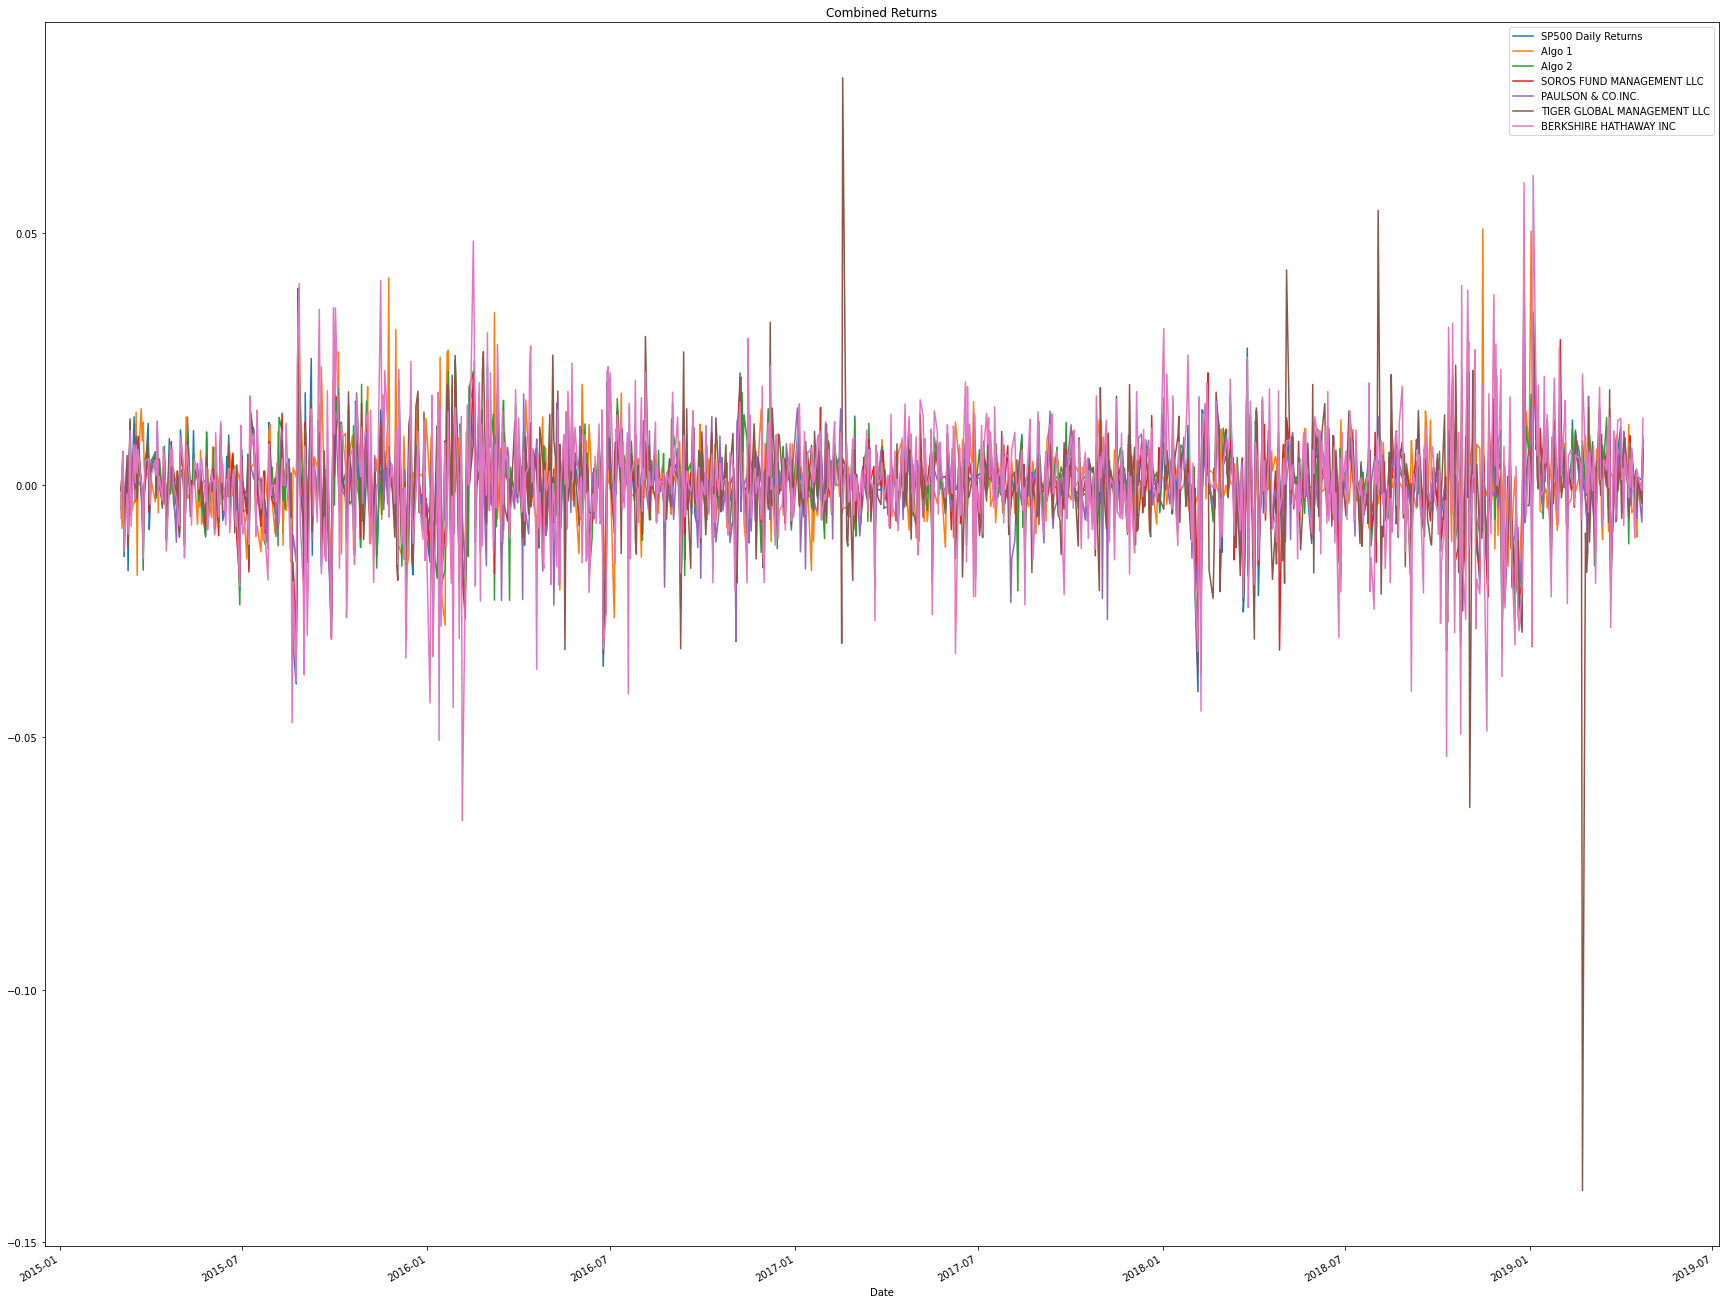

In [17]:
# Plot the daily returns of all portfolios
combined_returns.plot(figsize=(30,25), title="Combined Returns")

#### Calculate and Plot cumulative returns.

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.head()

,SP500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.008907,-0.010514,0.001464,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,-0.007722,-0.011459,0.005794,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.021786,-0.016359,-0.005733,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.017928,-0.021717,-0.004437,-0.002383,0.002951,-0.003367,-0.010466


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

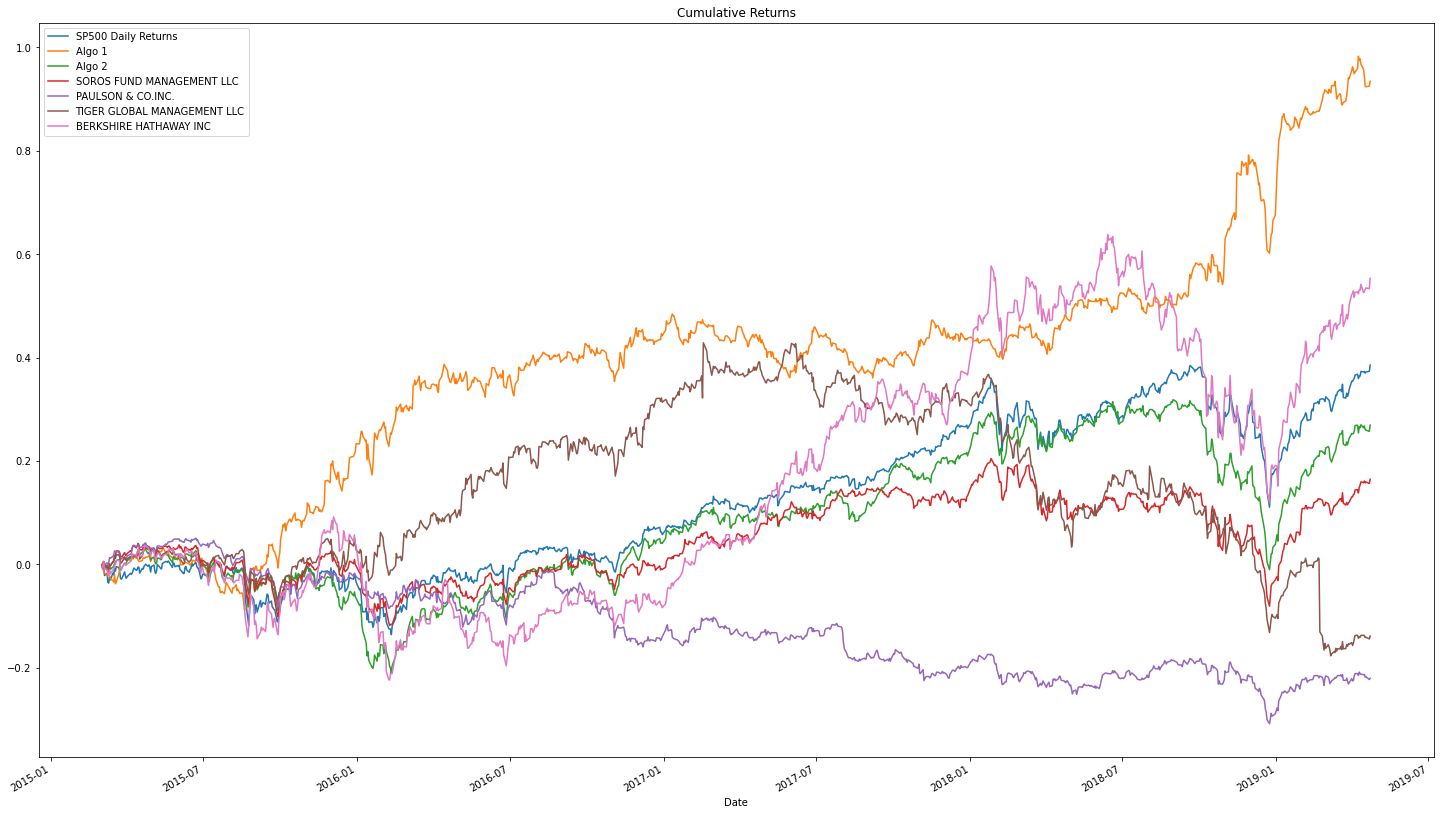

In [19]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(25,15), title="Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

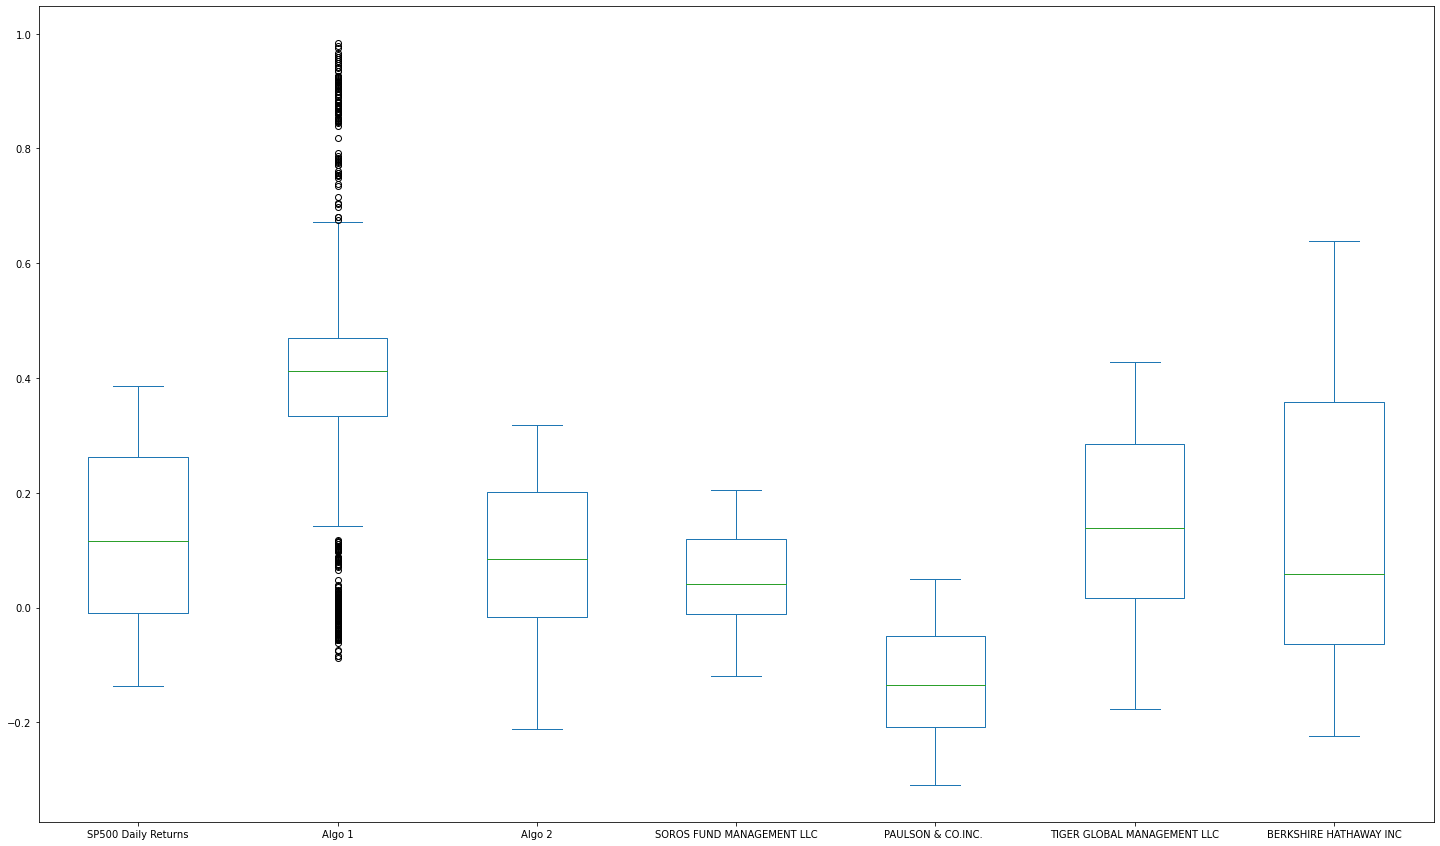

In [20]:
# Box plot to visually show risk
cumulative_returns.plot.box(figsize = (25, 15))

### Calculate Standard Deviations

In [21]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
print("Daily standard deviations of all portfolios:")
daily_std

Daily standard deviations of all portfolios:


SP500 Daily Returns            0.008554
Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = combined_returns["SP500 Daily Returns"].std()

# Determine which portfolios are riskier than the S&P 500, ie have a higher std than the S&P 500 using a boolean statement
daily_std > sp500_std

SP500 Daily Returns            False
Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [23]:
print(f"The S&P500 daily standard deviation is {sp500_std}")
print("TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC have higher risk than the SP500 based on past performance.")

The S&P500 daily standard deviation is 0.008553731597758204
TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC have higher risk than the SP500 based on past performance.


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SP500 Daily Returns            0.135786
Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21 day standard deviation for all portfolios'}, xlabel='Date'>

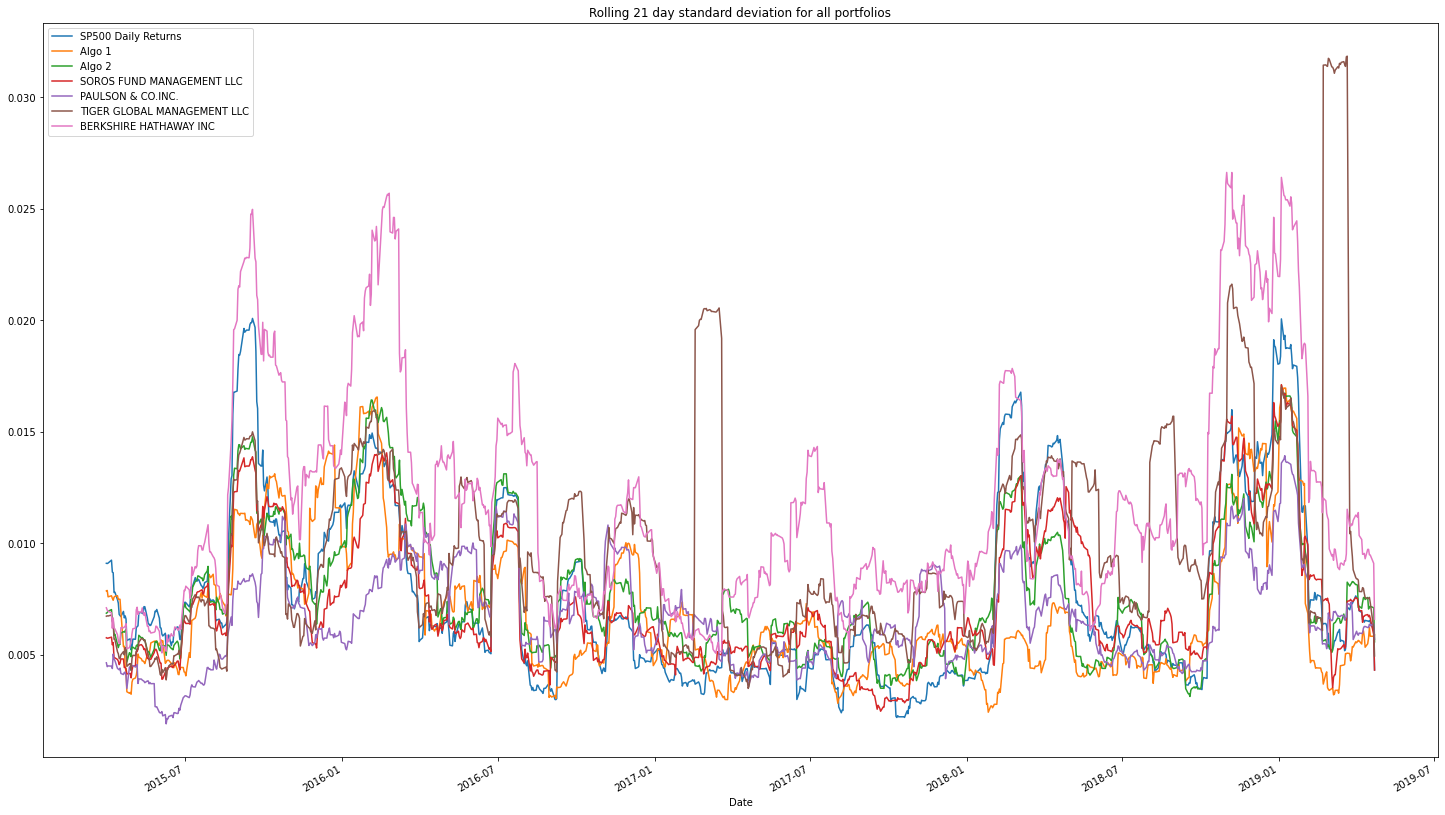

In [25]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_all = combined_returns.rolling(window = 21).std()
# Plot the rolling standard deviation
rolling_std_all.plot(figsize=(25,15), title="Rolling 21 day standard deviation for all portfolios")

### Calculate and plot the correlation

In [26]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display the correlation matrix
correlation

,SP500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SP500 Daily Returns,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [27]:
# Calculate rolling 60 day covariance of a single portfolio, in this case selected Berkshire against the SP500
covariance_BKH_rolling = combined_returns["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined_returns["SP500 Daily Returns"])
covariance_BKH_rolling.head()

Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
dtype: float64

In [28]:
# Calculate rolling 60 day variance of S&P 500
sp500_variance_rolling = combined_returns["SP500 Daily Returns"].rolling(window=60).var()
sp500_variance_rolling.head()

Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
Name: SP500 Daily Returns, dtype: float64

In [29]:
# Compute rolling 60 day beta of BKH against SP500 returns
bkh_beta_rolling = covariance_BKH_rolling / sp500_variance_rolling
bkh_beta_rolling.head()

Date
2015-03-03   NaN
2015-03-04   NaN
2015-03-05   NaN
2015-03-06   NaN
2015-03-09   NaN
dtype: float64

<AxesSubplot:title={'center':'60-day rolling beta between Berkshire Hathaway and SP500'}, xlabel='Date'>

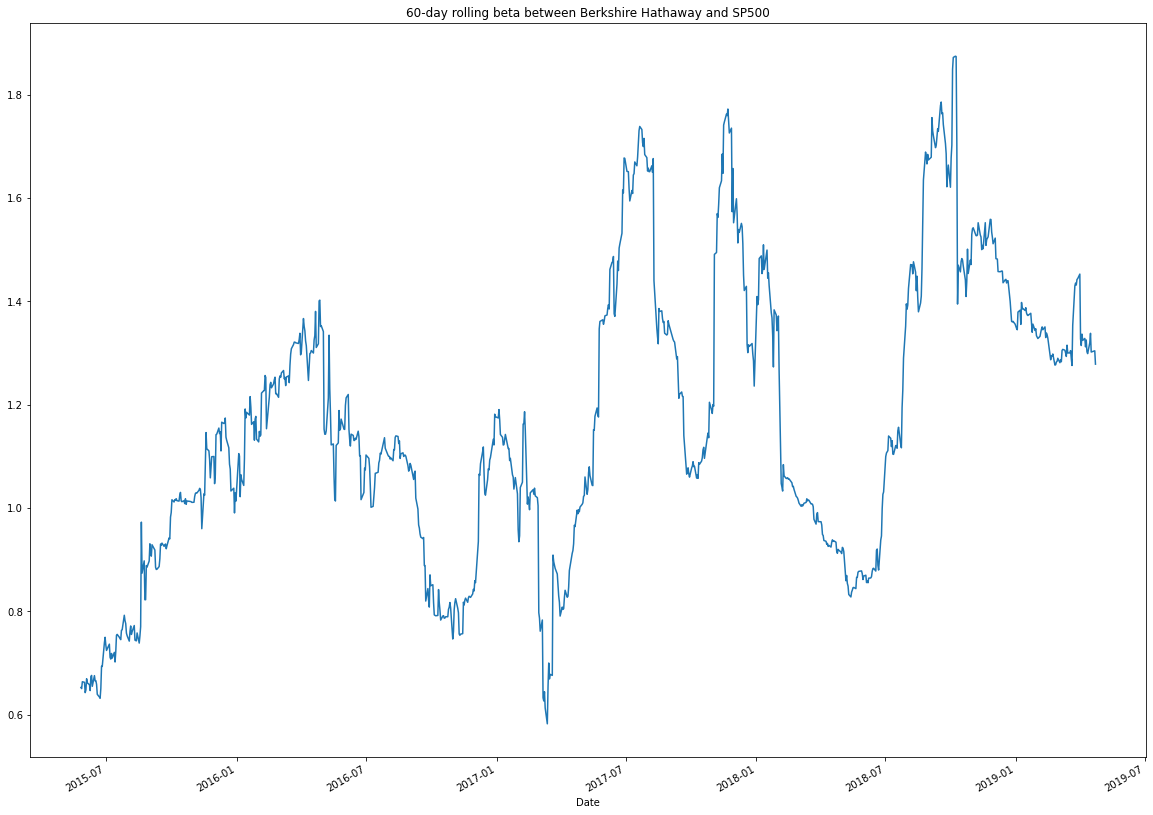

In [30]:
# Plot the 60-day rolling beta between Berkshire Hathaway and SP500
bkh_beta_rolling.plot(figsize=(20, 15), title='60-day rolling beta between Berkshire Hathaway and SP500')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Exponentially weighted moving averages with 21 -day half life'}, xlabel='Date'>

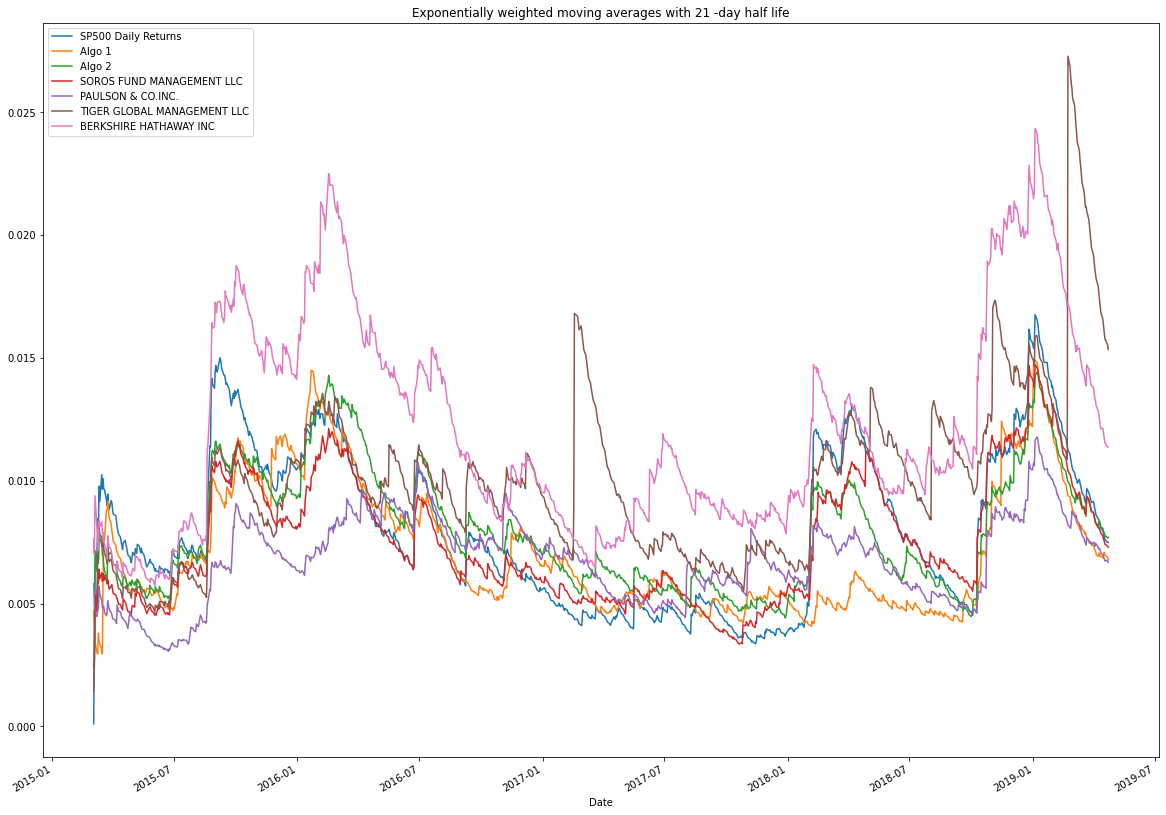

In [31]:
# Use `ewm` to calculate the rolling window
combined_returns_ewm = combined_returns.ewm(halflife=21).std()
combined_returns_ewm.plot(figsize=(20, 15), title="Exponentially weighted moving averages with 21 -day half life")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [32]:
# Calculate annualized Sharpe Ratios
annualized_sharpe_ratio = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
annualized_sharpe_ratio

SP500 Daily Returns            0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

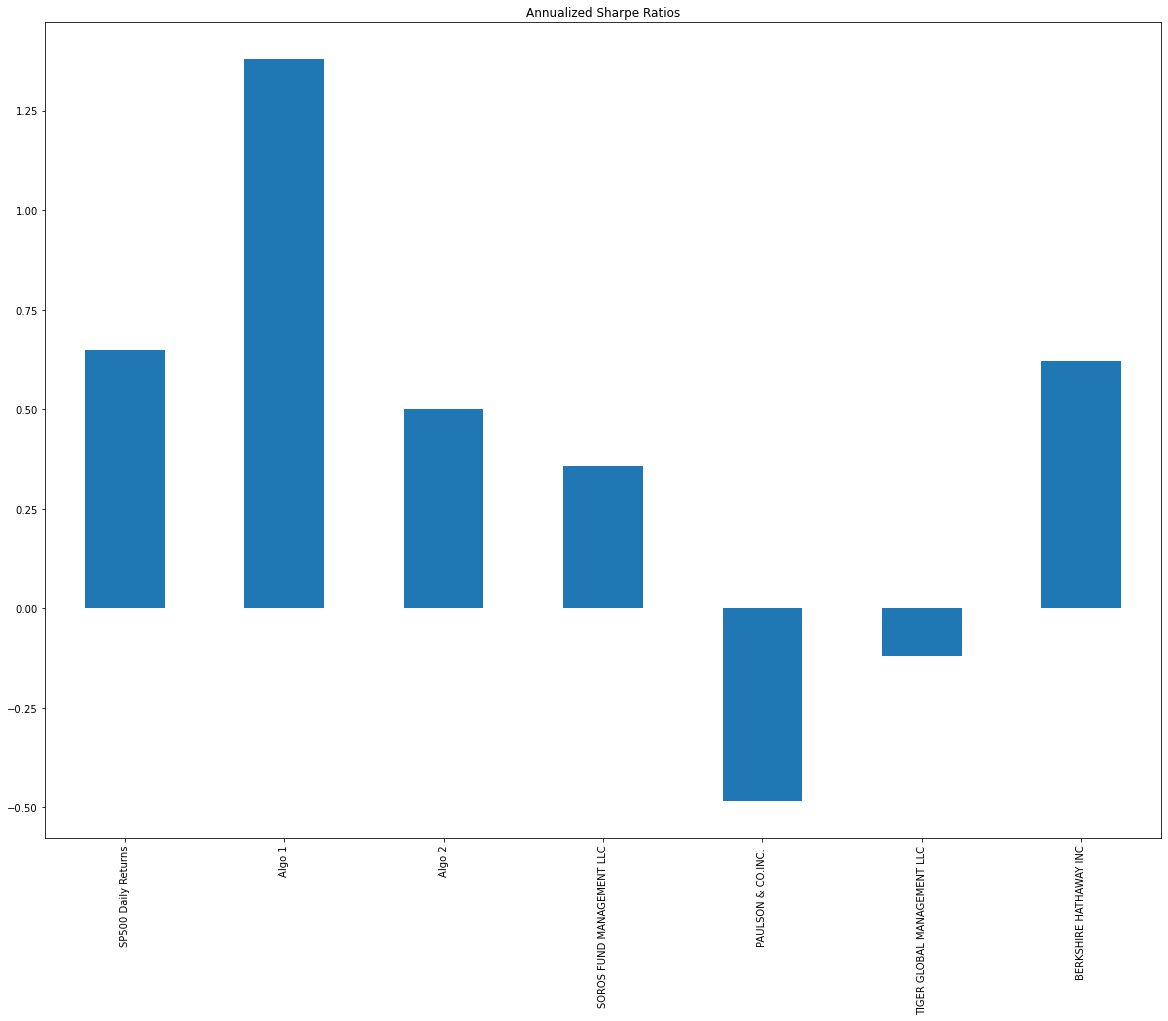

In [33]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio.plot(kind = "bar", figsize=(20,15), title="Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Algo 1 was able to outperform but Algo 2 was not.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [34]:
# Read data from Apple stock, drop extra column and rename column according to the stock
aapl_path = Path("aapl_historical.csv")
aapl_data = pd.read_csv(aapl_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_data.sort_index(ascending=True, inplace=True)
aapl_data = aapl_data.drop(columns=["Symbol"])
aapl_data = aapl_data.rename(columns={"NOCP": "Apple",})
aapl_data.head()

,Apple
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [35]:
# Read data from 2nd stock Google, drop extra column and rename column according to the stock
goog_path = Path("goog_historical.csv")
goog_data = pd.read_csv(goog_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_data.sort_index(ascending=True, inplace=True)
goog_data = goog_data.drop(columns=["Symbol"])
goog_data = goog_data.rename(columns={"NOCP": "Google",})
goog_data.head()

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [36]:
# Read data from 3rd stock Costco, drop extra column and rename column according to the stock
cost_path = Path("cost_historical.csv")
cost_data = pd.read_csv(cost_path, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_data.sort_index(ascending=True, inplace=True)
cost_data = cost_data.drop(columns=["Symbol"])
cost_data = cost_data.rename(columns={"NOCP": "Costco",})
cost_data.head()

,Costco
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [37]:
# Combine all stocks in a single DataFrame, normalize the date index
combined_stocks = pd.concat([aapl_data, goog_data, cost_data], axis="columns", join="inner")
combined_stocks.sort_index(inplace=True)
combined_stocks.index.names = ["Date"]
combined_stocks.index = combined_stocks.index.normalize()
combined_stocks.head()

,Apple,Google,Costco
Date,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [38]:
# Calculate the daily returns
daily_returns_stocks = combined_stocks.pct_change()
# Drop the NAs
daily_returns_stocks.dropna(inplace=True)
# Display sample data
daily_returns_stocks.head()

,Apple,Google,Costco
Date,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [39]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns_stocks.dot(weights)

# Display sample data
weighted_returns

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [40]:
# Join your returns DataFrame to the original returns DataFrame and clean the data
joined_portfolio_returns = pd.concat((weighted_returns, combined_returns), axis="columns", join="inner")
joined_portfolio_returns.rename(columns = {0:"Selected Portfolio"}, inplace=True)
joined_portfolio_returns = joined_portfolio_returns.replace(0, np.nan)
joined_portfolio_returns.dropna(inplace=True)
joined_portfolio_returns

,Selected Portfolio,SP500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,,
2018-05-15,-0.010064,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606
2018-05-16,0.009403,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310
2018-05-17,-0.001595,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140
2018-05-18,-0.006061,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212
2018-05-21,0.007600,0.007387,-0.003092,0.004924,0.002503,-0.001195,-0.001153,0.010370
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,0.009292,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001545,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`

combined_stocks_std = joined_portfolio_returns.std()
annualized_combined_stocks_std = combined_stocks_std * np.sqrt(252)
annualized_combined_stocks_std

Selected Portfolio             0.213101
SP500 Daily Returns            0.153024
Algo 1                         0.134706
Algo 2                         0.140362
SOROS FUND MANAGEMENT LLC      0.148253
PAULSON & CO.INC.              0.117988
TIGER GLOBAL MANAGEMENT LLC    0.235023
BERKSHIRE HATHAWAY INC         0.249815
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21 day Standard Deviation'}, xlabel='Date'>

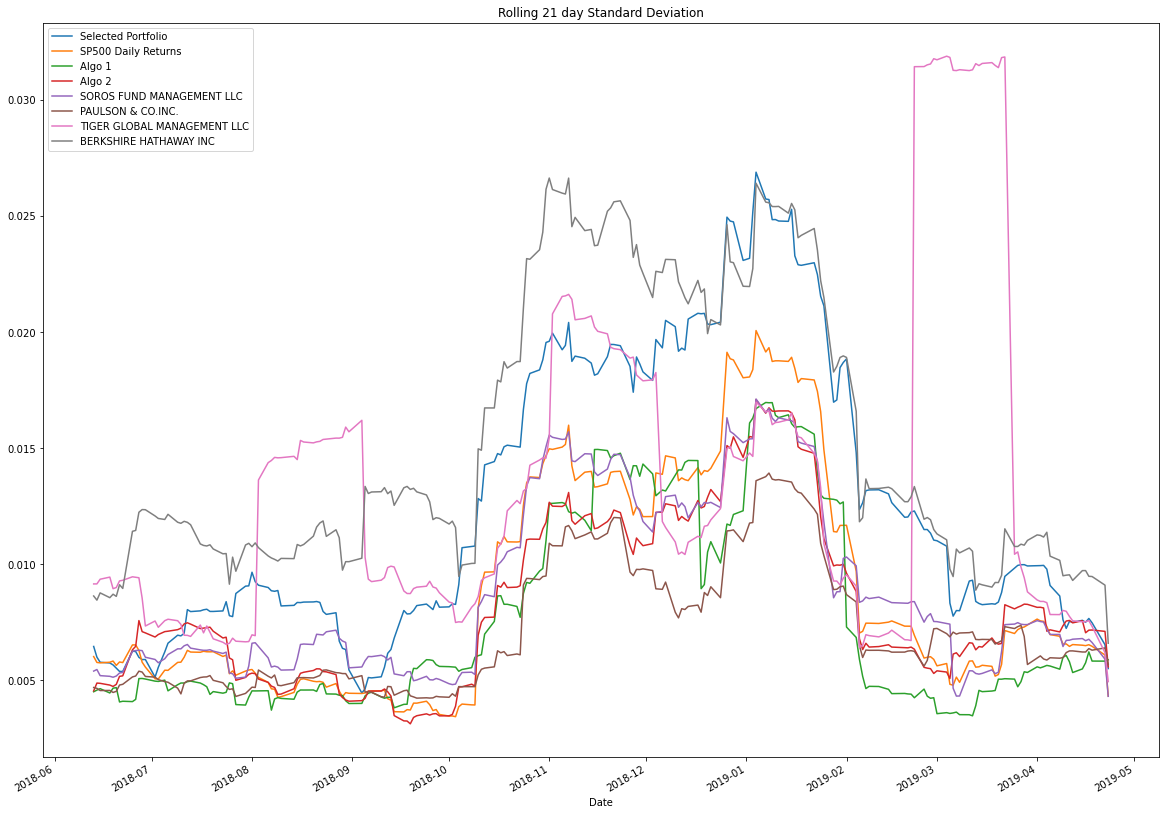

In [42]:
# Calculate rolling standard deviation
joined_portfolio_returns_rolling21 = joined_portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
joined_portfolio_returns_rolling21.plot(figsize=(20,15), title="Rolling 21 day Standard Deviation")

### Calculate and plot the correlation

In [43]:
# Calculate and plot the correlation
joined_portfolio_correlation = joined_portfolio_returns.corr()
joined_portfolio_correlation

,Selected Portfolio,SP500 Daily Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Selected Portfolio,1.000000,0.871758,0.261153,0.739349,0.735630,0.646279,0.393066,0.803705
SP500 Daily Returns,0.871758,1.000000,0.289653,0.874815,0.880925,0.770092,0.482865,0.856060
Algo 1,0.261153,0.289653,1.000000,0.365609,0.338713,0.362348,0.115441,0.327983
Algo 2,0.739349,0.874815,0.365609,1.000000,0.867212,0.787594,0.411359,0.786718
SOROS FUND MANAGEMENT LLC,0.735630,0.880925,0.338713,0.867212,1.000000,0.791961,0.478691,0.816676
PAULSON & CO.INC.,0.646279,0.770092,0.362348,0.787594,0.791961,1.000000,0.485422,0.650757
TIGER GLOBAL MANAGEMENT LLC,0.393066,0.482865,0.115441,0.411359,0.478691,0.485422,1.000000,0.325486
BERKSHIRE HATHAWAY INC,0.803705,0.856060,0.327983,0.786718,0.816676,0.650757,0.325486,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Selected Portfolio against SP500 returns'}, xlabel='Date'>

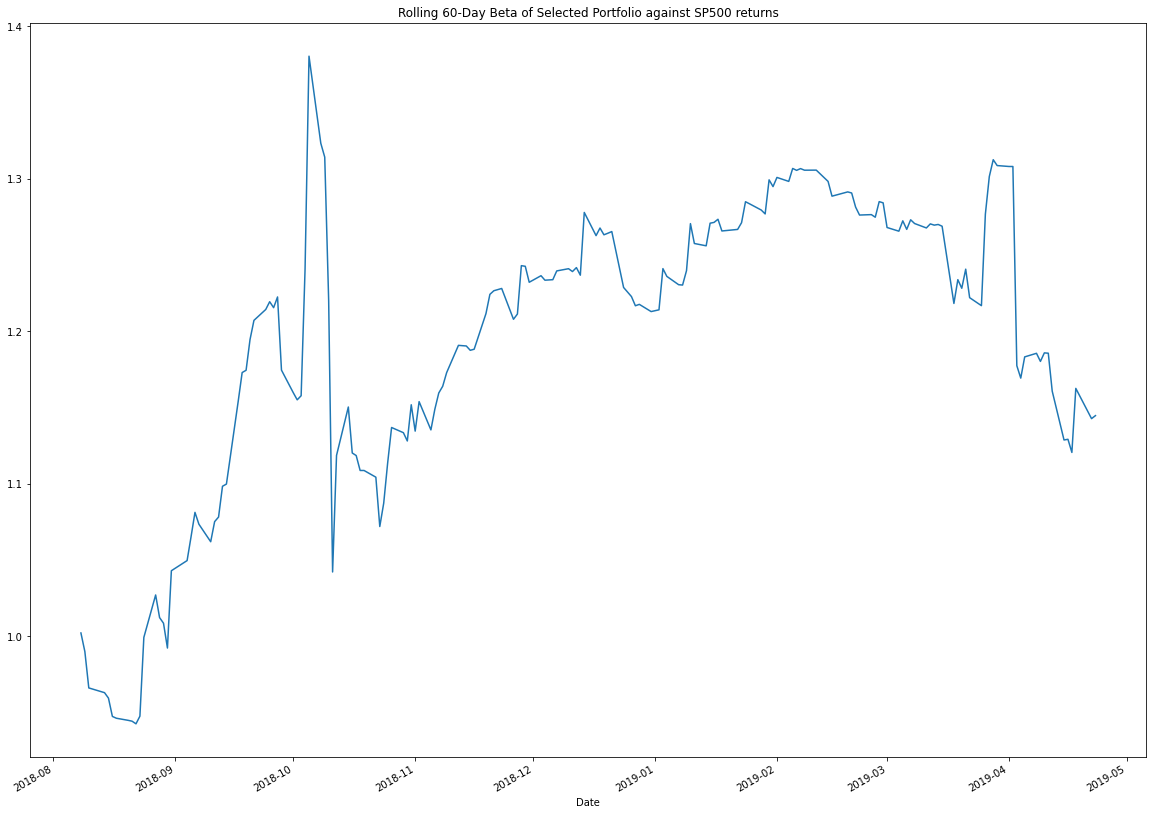

In [44]:
# Calculate and plot the rolling 60-day Beta
portfolio_covariance_rolling60 = joined_portfolio_returns["Selected Portfolio"].rolling(window=60).cov(joined_portfolio_returns["SP500 Daily Returns"])

sp500_variance_rolling60 = joined_portfolio_returns["SP500 Daily Returns"].rolling(window=60).var()

comparative_beta = portfolio_covariance_rolling60 / sp500_variance_rolling60

comparative_beta.plot(figsize=(20,15), title="Rolling 60-Day Beta of Selected Portfolio against SP500 returns")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<AxesSubplot:title={'center':'Annualzed Sharpe Ratios'}>

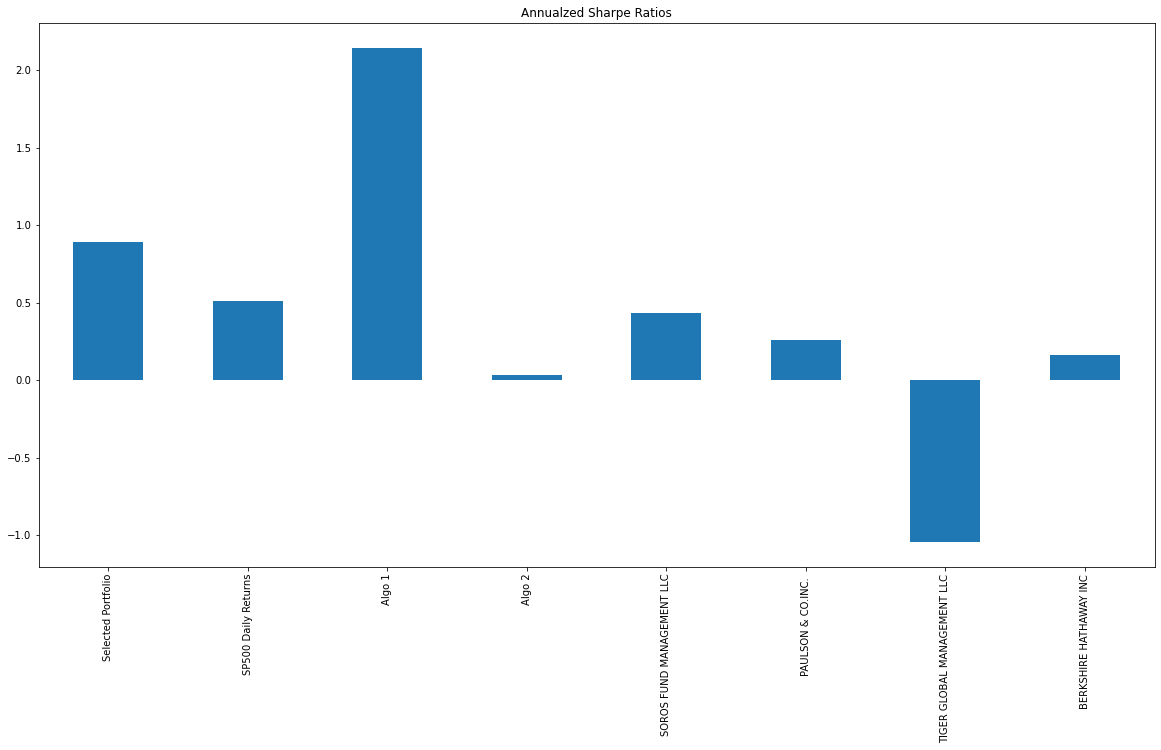

In [45]:
# Calculate Annualized Sharpe Ratios and visualize the sharpe ratios as a bar plot
annualized_sharpe_ratio = (joined_portfolio_returns.mean() * 252) / (joined_portfolio_returns.std() * np.sqrt(252))
annualized_sharpe_ratio.plot(kind="bar", figsize=(20,10), title="Annualzed Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [46]:
print("The Selected Portfolio of Costco, Google and Apple outperformed all the others except Algo 1.")

The Selected Portfolio of Costco, Google and Apple outperformed all the others except Algo 1.
